In [26]:
using Plots,LinearAlgebra, MatrixMarket, Random

In [27]:
ep = 10 ^ (-6)

1.0e-6

In [28]:
function Arnoldi(A, r0,m)
    v = r0/norm(r0,2)
    V=zeros(n,m)
    H = zeros(m+1,m)
    for j = 1:m
  
        V[:,j]=v
        w = A*v
        for i = 1:j
            H[i,j]=V[:,i]'*w
            w = w - H[i,j]*V[:,i]
        end
        H[j+1,j]=norm(w,2)
        if H[j+1,j]==0
            return V,H
        end
        v=w/H[j+1,j]
    end
    return V,H
end

Arnoldi (generic function with 1 method)

In [29]:
function predcon(A)
    d = diag(A)
    for i = 1:length(d)
        if d[i]==0
            d[i]=1
        else
            d[i]=1/d[i]
        end
    end
    return d
end

predcon (generic function with 1 method)

In [30]:
function Matmul(M,b)
    for i = 1:n 
        b[i]=b[i]*M[i]
    end
    return b
end

Matmul (generic function with 1 method)

In [31]:
function gmres(A,b,x_0,m)
    n = length(b)
    M = ones(n)
    #M=svd(A).Vt
    M=predcon(A)
    
  
    Q = zeros(n,m+1)
    res = Matmul(M,b-A*x_0)
    Q[:,1] = res/norm(res)
    H = zeros(m+1,m)
    x=x_0
   
    # Initial solution is zero.
    residual = [norm(res);zeros(m)]

    for j in 1:m
        # Next step of Arnoldi iteration.
        v = Matmul(M,A*Q[:,j])
        for i in 1:j
            H[i,j] = dot(Q[:,i],v)
            v -= H[i,j]*Q[:,i]
        end
        H[j+1,j] = norm(v)
        Q[:,j+1] = v/H[j+1,j]

        # Solve the minimum residual problem.
        r = [norm(res); zeros(j)]
        H_hat = copy(H[1:j+1,1:j])
        V_hat = copy(Q[:,1:j])
        
        y = pinv(H_hat'*H_hat)*H_hat'*r
        x = x_0 + V_hat*y
        residual[j+1] = norm(A*x - b)
    end
    return x,residual
end

gmres (generic function with 1 method)

In [32]:
function gmres_restart(A,b,x_0,m_max)
    error = [norm(b-A*x_0)]
    while error[end]>ep
        x_0,res = gmres(A,b,x_0,m_max)
        error = vcat(error,res)
        #println(error[end])
    end
    return error
end

gmres_restart (generic function with 1 method)

In [33]:
M = MatrixMarket.mmread("west0067.mtx")
M = Matrix(M)
n = size(M)[1]
e1 = zeros(n)
e1[1]=1
b = ones(n)
m_max =65
nothing;

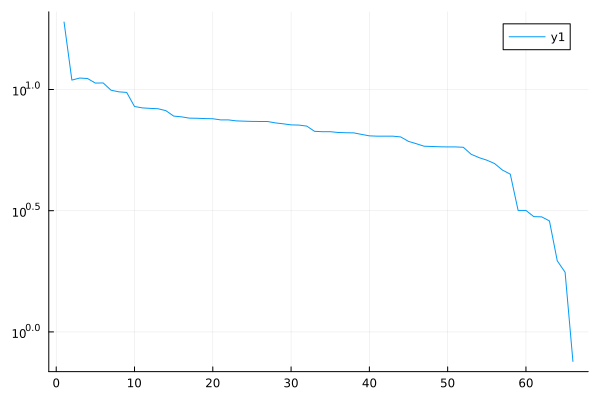

In [34]:
x,error = gmres(M,b,e1,m_max)

plot(error,yaxis=:log)

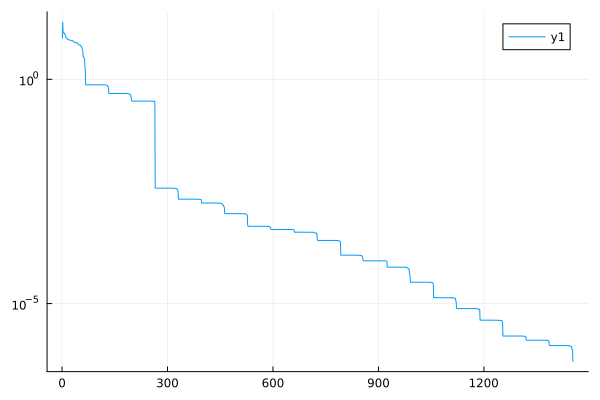

In [35]:
error2 = gmres_restart(M,b,e1,m_max)
plot(error2,yaxis=:log)

In [36]:
M = MatrixMarket.mmread("nnc261.mtx")
M = Matrix(M)
n = size(M)[1]
e1 = zeros(n)
e1[1]=1
b = ones(n)
m_max = n
nothing;

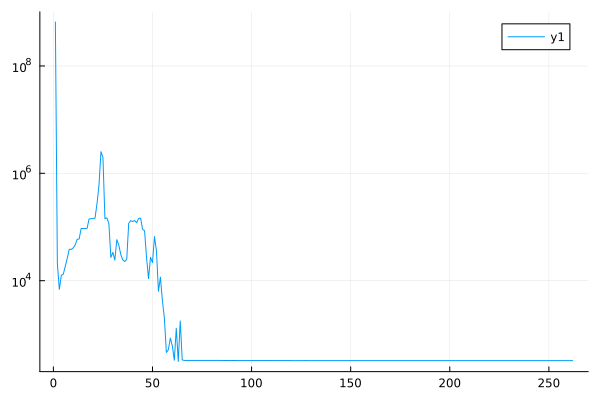

In [37]:
x,error = gmres(M,b,e1,m_max)

plot(error,yaxis=:log)